<a href="https://colab.research.google.com/github/tntnu/default/blob/main/%5B%EA%B0%9C%EC%9D%B8%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%EC%97%B0%EC%8A%B5%5D_%EC%B1%84%EB%AC%B4%EB%B6%88%EC%9D%B4%ED%96%89%EC%97%AC%EB%B6%80%EC%98%88%EC%B8%A1_1%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
from google.colab import files
uploaded_file = files.upload()

Saving train.csv to train.csv


In [3]:
from google.colab import files
uploaded_file = files.upload()

Saving test.csv to test.csv


# ***1. Exploratory data analysis***

## ***1.1 데이터 탐색***

In [4]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
train.head()

,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
0,TRAIN_00000,자가,1941337.5,10년 이상,0.0,9,13.4,400597.5,0,24,1,부채 통합,단기 상환,390903.0,225457.5,8806.5,767,0
1,TRAIN_00001,월세,1979505.0,10년 이상,0.0,5,15.1,360679.5,0,11,0,부채 통합,단기 상환,1002184.5,64749.0,24961.5,767,0
2,TRAIN_00002,월세,1356381.0,4년,0.0,12,18.8,491770.5,1,74,3,부채 통합,단기 상환,227775.0,487644.0,12069.0,800,1
3,TRAIN_00003,월세,1049017.5,6년,0.0,15,14.8,411546.0,1,22,1,부채 통합,단기 상환,251383.5,413211.0,31749.0,796,1
4,TRAIN_00004,월세,4320217.5,2년,0.0,11,26.1,895288.5,0,32,0,부채 통합,장기 상환,1163176.5,78991.5,5862.0,751,0


In [ ]:
train.columns

Index(['UID', '주거 형태', '연간 소득', '현재 직장 근속 연수', '체납 세금 압류 횟수', '개설된 신용계좌 수',
       '신용 거래 연수', '최대 신용한도', '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수',
       '대출 목적', '대출 상환 기간', '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수',
       '채무 불이행 여부'],
      dtype='object')

In [ ]:
train.shape

(10000, 18)

In [ ]:
test.shape

(2062, 17)

In [ ]:
train.isnull().sum()
# 결측치가 없는 아주 깔끔한 데이터

,0
UID,0
주거 형태,0
연간 소득,0
현재 직장 근속 연수,0
체납 세금 압류 횟수,0
개설된 신용계좌 수,0
신용 거래 연수,0
최대 신용한도,0
신용 문제 발생 횟수,0
마지막 연체 이후 경과 개월 수,0


In [ ]:
test.isnull().sum()

,0
UID,0
주거 형태,0
연간 소득,0
현재 직장 근속 연수,0
체납 세금 압류 횟수,0
개설된 신용계좌 수,0
신용 거래 연수,0
최대 신용한도,0
신용 문제 발생 횟수,0
마지막 연체 이후 경과 개월 수,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UID                10000 non-null  object 
 1   주거 형태              10000 non-null  object 
 2   연간 소득              10000 non-null  float64
 3   현재 직장 근속 연수        10000 non-null  object 
 4   체납 세금 압류 횟수        10000 non-null  float64
 5   개설된 신용계좌 수         10000 non-null  int64  
 6   신용 거래 연수           10000 non-null  float64
 7   최대 신용한도            10000 non-null  float64
 8   신용 문제 발생 횟수        10000 non-null  int64  
 9   마지막 연체 이후 경과 개월 수  10000 non-null  int64  
 10  개인 파산 횟수           10000 non-null  int64  
 11  대출 목적              10000 non-null  object 
 12  대출 상환 기간           10000 non-null  object 
 13  현재 대출 잔액           10000 non-null  float64
 14  현재 미상환 신용액         10000 non-null  float64
 15  월 상환 부채액           10000 non-null  float64
 16  신용 점수              1000

## ***1.2 데이터 시각화***

* Bar chart for categorical features

1. 주거 형태
2. 현재 직장 근속 연수
3. 대출 목적
4. 대출 상환 기간
5. 체납 세금 압류 횟수





📌 어떤 변수가 종속 변수에 영향을 미치는지 확인하려면 "그룹 내 비율"을 봐야 함

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
plt.rc('font', family='NanumBarunGothic')

In [7]:
def bar_chart(feature) :
  default = train[train['채무 불이행 여부'] == 1][feature].value_counts()
  non_default = train[train['채무 불이행 여부'] == 0][feature].value_counts()
  df = pd.DataFrame([default, non_default])
  df.index = ['default', 'non_default']
  df.plot(kind = 'bar', stacked = True, figsize = (10, 5)) # stacked=True → 누적 막대 그래프

In [8]:
default = train[train['채무 불이행 여부'] == 1]['주거 형태'].value_counts()
default

,count
주거 형태,
월세,1559
주택 담보 대출 (거주 중),1107
자가,734
주택 담보 대출 (비거주 중),12


In [9]:
non_default = train[train['채무 불이행 여부'] == 0]['주거 형태'].value_counts()
non_default

,count
주거 형태,
주택 담보 대출 (거주 중),2526
월세,2491
자가,1507
주택 담보 대출 (비거주 중),64


In [10]:
df = pd.DataFrame([default, non_default])
df

주거 형태,월세,주택 담보 대출 (거주 중),자가,주택 담보 대출 (비거주 중)
count,1559,1107,734,12
count,2491,2526,1507,64


### ***1.2.1 주거형태***

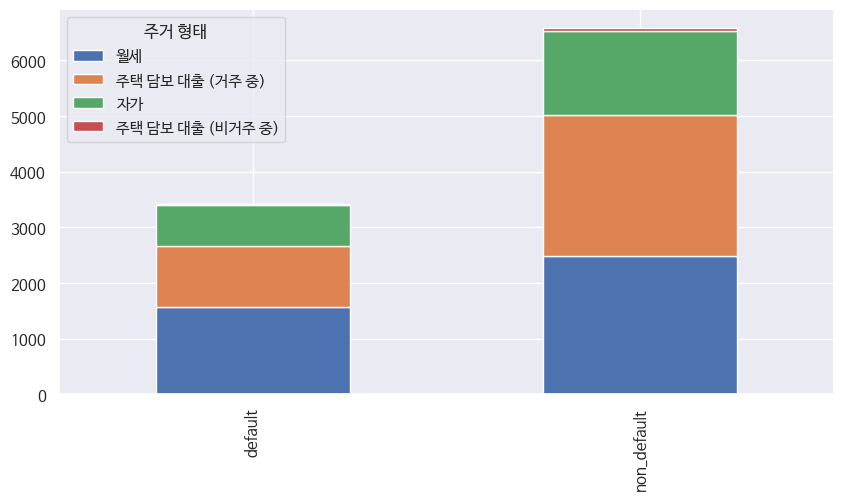

In [ ]:
bar_chart('주거 형태')

In [ ]:
train.groupby('채무 불이행 여부')['주거 형태'].value_counts(normalize = True).unstack() *100 # unstack() 데이터 구조 차이

# 월세 거주자는 채무 불이행 비율이 더 높음 (+7.88%)
# → 월세 거주자는 대출 상환 능력이 상대적으로 낮을 가능성이 있음 (소득이 불안정할 가능성)
# -> 자가 비율은 비슷하므로 채무 불이행에 미치는 영향이 크지 않음
# -> 주택 담보 대출(거주 중)의 경우 불이행 비율이 낮으므로 경제적으로 더 안정적인 경우가 많을 가능성 있음
# -> 주택 담보 대출(비거주 중)의 경우 불이행 비율이 낮으므로 경제적으로 더 안정적인 경우가 많을 가능성 있음
# 📌 월세만 유독 불이행 비율이 높아서 "주거 형태"가 불이행을 예측하는 데 영향을 줄 수도 있음(실제로는 아닐수도 있음, 관계를 탐색하는데 유용)

주거 형태,월세,자가,주택 담보 대출 (거주 중),주택 담보 대출 (비거주 중)
채무 불이행 여부,,,,
0,37.811172,22.874924,38.342441,0.971463
1,45.691676,21.512309,32.444314,0.351700


In [ ]:
train.groupby('채무 불이행 여부')['주거 형태'].value_counts(normalize = True) * 100

채무 불이행 여부  주거 형태           
0          주택 담보 대출 (거주 중)     38.342441
           월세                  37.811172
           자가                  22.874924
           주택 담보 대출 (비거주 중)     0.971463
1          월세                  45.691676
           주택 담보 대출 (거주 중)     32.444314
           자가                  21.512309
           주택 담보 대출 (비거주 중)     0.351700
Name: proportion, dtype: float64

### ***1.2.2 현재 직장 근속 연수***


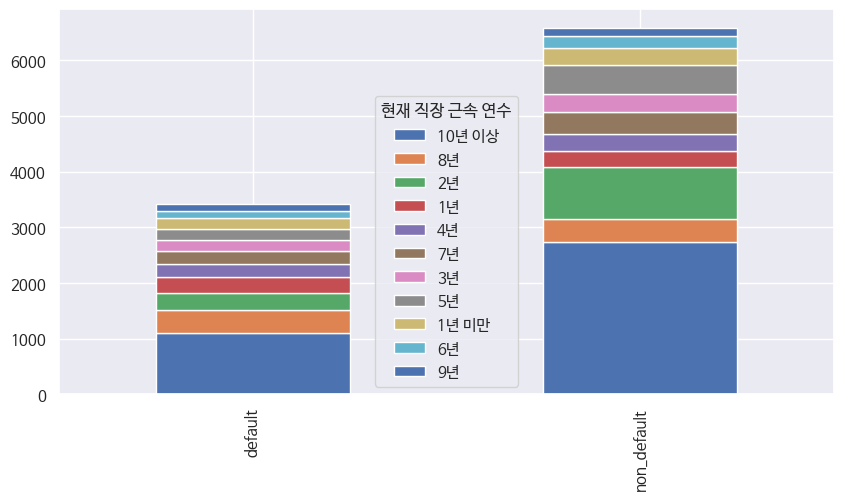

In [ ]:
bar_chart('현재 직장 근속 연수')

In [ ]:
train.groupby('채무 불이행 여부')['현재 직장 근속 연수'].value_counts(normalize = True).unstack() * 100

현재 직장 근속 연수,10년 이상,1년,1년 미만,2년,3년,4년,5년,6년,7년,8년,9년
채무 불이행 여부,,,,,,,,,,,
0,41.438980,4.523376,4.584092,13.995143,4.781421,4.584092,8.029751,3.309047,5.950213,6.466302,2.337583
1,32.180539,8.294256,5.451348,8.880422,6.096131,7.004689,5.861665,4.073857,6.652989,12.162954,3.341149


### ***1.2.3 대출 목적***

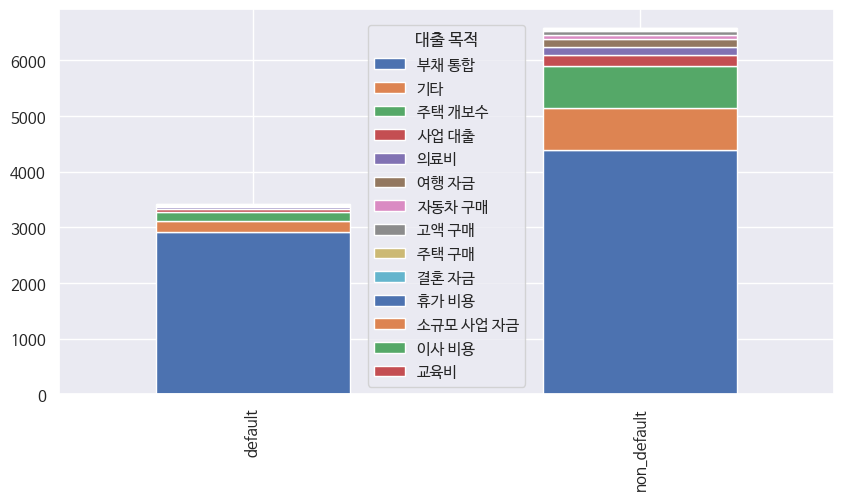

In [ ]:
bar_chart('대출 목적')

In [ ]:
train.groupby('채무 불이행 여부')['대출 목적'].value_counts(normalize = True).unstack() * 100

# 부채 통합의 경우 불이행 비율이 매우 높음

대출 목적,결혼 자금,고액 구매,교육비,기타,부채 통합,사업 대출,소규모 사업 자금,여행 자금,의료비,이사 비용,자동차 구매,주택 개보수,주택 구매,휴가 비용
채무 불이행 여부,,,,,,,,,,,,,,
0,0.182149,0.910747,0.045537,11.520947,66.590771,3.142077,0.394657,2.200971,1.927747,0.060716,1.244687,11.384335,0.333940,0.060716
1,0.058617,0.234467,NaN,6.184056,85.199297,1.377491,NaN,0.820633,0.908558,NaN,0.381008,4.660023,0.117233,0.058617


### ***1.2.4 대출 상환 기간***

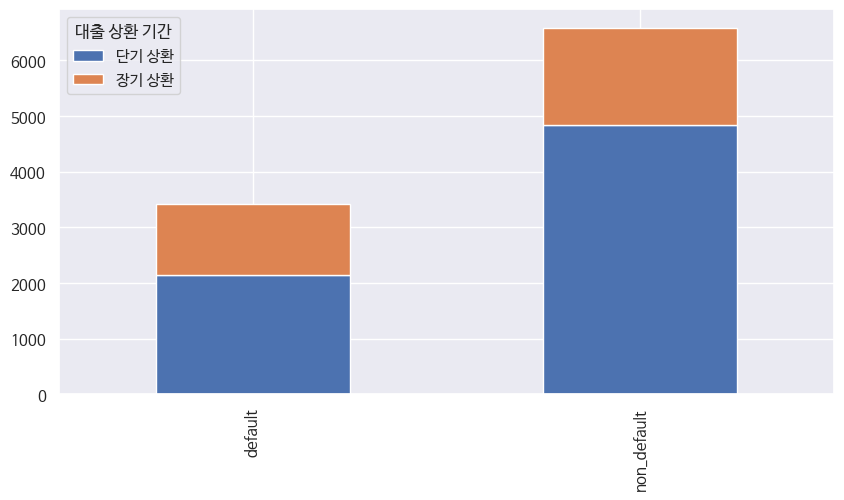

In [ ]:
bar_chart('대출 상환 기간')

In [ ]:
train.groupby('채무 불이행 여부')['대출 상환 기간'].value_counts(normalize = True).unstack() * 100
# 장기 상환의 경우 채무 불이행할 가능성 있음

대출 상환 기간,단기 상환,장기 상환
채무 불이행 여부,,
0,73.497268,26.502732
1,62.514654,37.485346


### 1.2.5 연간 소득

📌 ***하나의 그래프에서 여러 데이터를 비교 ➝ kdeplot()***  
📌 ***실제 데이터 개수와 분포를 비교 -> histplot()***  
📌 ***데이터가 밀집한 곳일수록 KDE 값이 높아짐***

In [ ]:
default = train[train['채무 불이행 여부'] == 1]
non_default = train[train['채무 불이행 여부'] == 0]

In [50]:
train['채무 불이행 여부'].value_counts()

,count
채무 불이행 여부,
0,6588
1,3412


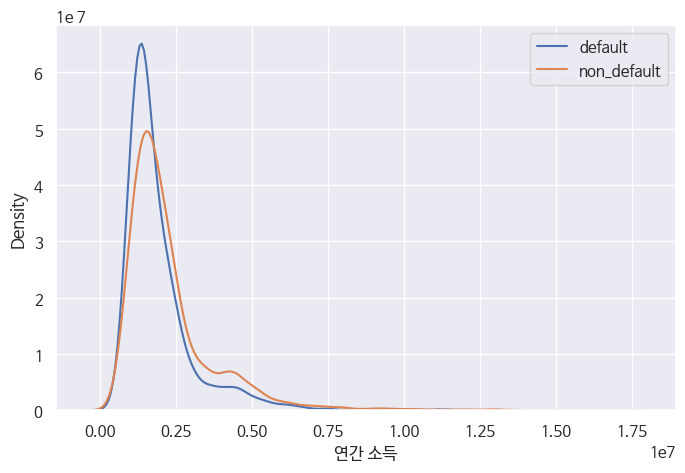

In [17]:
plt.figure(figsize=(8, 5))
sns.kdeplot(default['연간 소득'], label='default')
sns.kdeplot(non_default['연간 소득'], label='non_default')
plt.legend()

# 낮은 연간 소득인 경우 채무 불이행 밀도가 높으므로 상대적으로 채무 불이행일 경우가 높음

### ***1.2.6 체납 세금 압류 횟수***

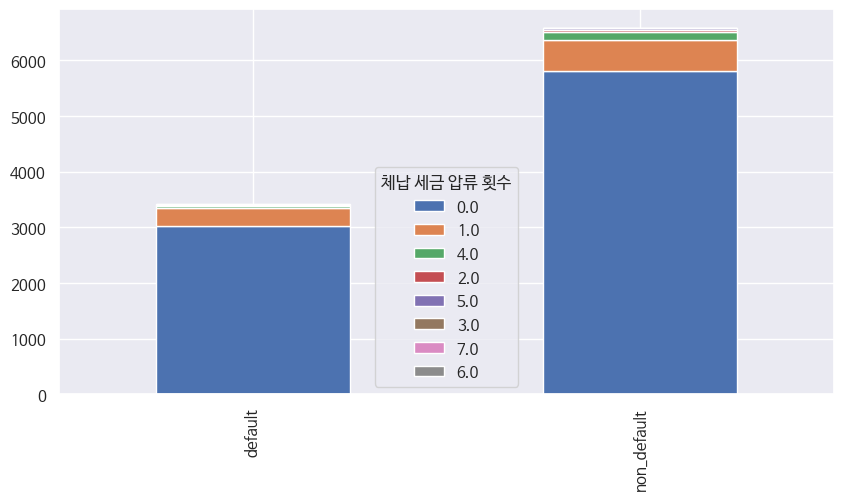

In [ ]:
bar_chart("체납 세금 압류 횟수")

In [ ]:
train.groupby('채무 불이행 여부')['체납 세금 압류 횟수'].value_counts(normalize = True).unstack() * 100
# 체납 세급 압류 횟수가 1, 2회인 경우 상대적으로 불이행일 경우 높음

체납 세금 압류 횟수,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
채무 불이행 여부,,,,,,,,
0,88.084396,8.636916,0.561627,0.045537,2.109897,0.364299,0.045537,0.151791
1,88.599062,9.232122,0.674091,0.029308,1.084408,0.381008,NaN,NaN


### ***1.2.7 개설된 신용계좌 수***

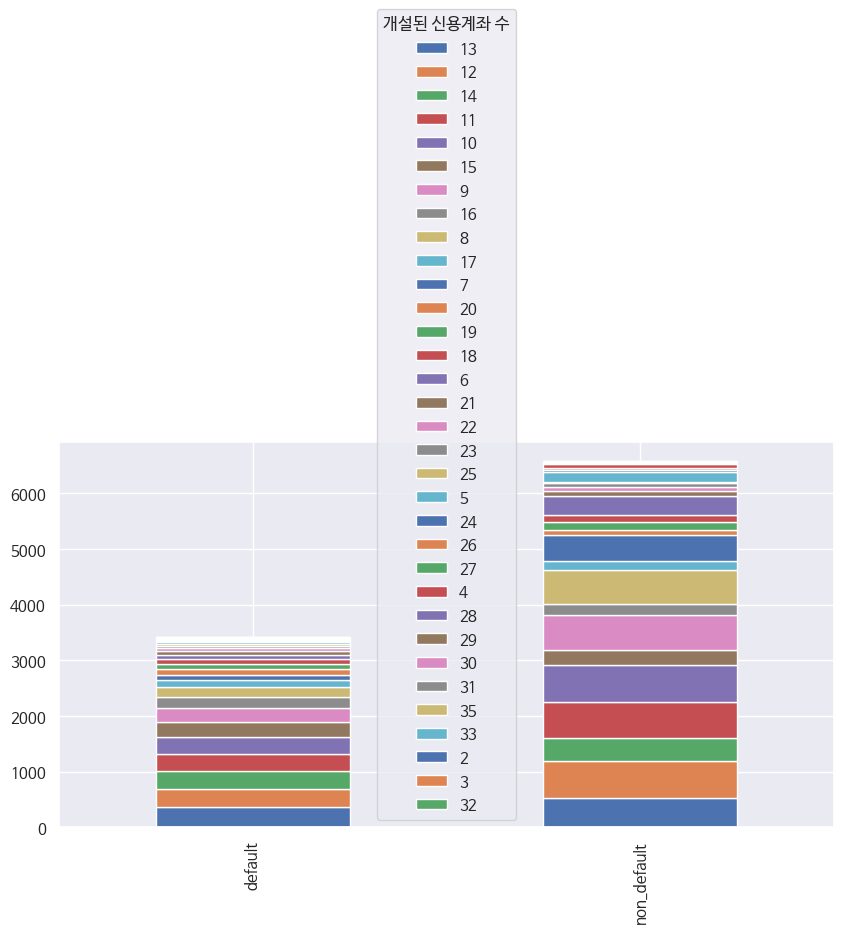

In [ ]:
bar_chart('개설된 신용계좌 수')

In [ ]:
train.groupby("채무 불이행 여부")['개설된 신용계좌 수'].value_counts(normalize = True).unstack() * 100
# 개설된 신용계좌 수가 많을수록 불이행 가능성 높음

개설된 신용계좌 수,2,3,4,5,6,7,8,9,10,11,...,25,26,27,28,29,30,31,32,33,35
채무 불이행 여부,,,,,,,,,,,,,,,,,,,,,
0,0.030358,0.303582,1.123254,2.656345,5.085003,7.088646,9.107468,9.562842,10.230723,9.699454,...,0.425015,0.440194,0.166970,0.151791,0.151791,0.045537,0.091075,0.060716,0.015179,NaN
1,0.029308,0.029308,0.263775,0.849941,2.403283,2.989449,5.627198,7.004689,8.763189,9.114889,...,0.937866,0.410317,0.381008,0.234467,0.175850,0.117233,0.029308,NaN,0.029308,0.029308


### ***1.2.8 신용 거래 연수***

In [12]:
train['신용 거래 연수'].describe()

,신용 거래 연수
count,10000.000000
mean,19.879360
std,7.206693
min,6.000000
25%,14.600000
50%,17.950000
75%,24.100000
max,51.700000


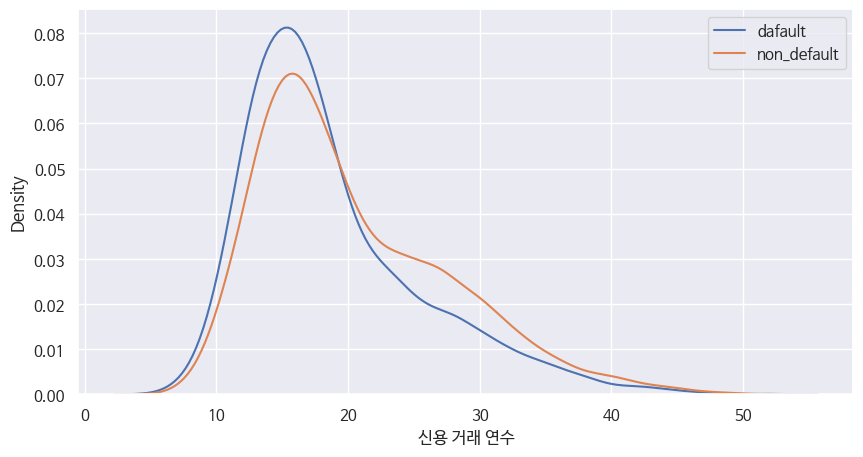

In [16]:
plt.figure(figsize = (10, 5))
sns.kdeplot(default['신용 거래 연수'],label = 'dafault')
sns.kdeplot(non_default['신용 거래 연수'], label = 'non_default')

plt.legend()
plt.show()

# 20보다 작은 경우 불이행 가능성 높음

### ***1.2.9 최대 신용한도***

In [18]:
train['최대 신용한도'].describe()

,최대 신용한도
count,1.000000e+04
mean,1.175265e+06
std,1.604199e+06
min,0.000000e+00
25%,4.482476e+05
50%,7.670910e+05
75%,1.147283e+06
max,2.323233e+07


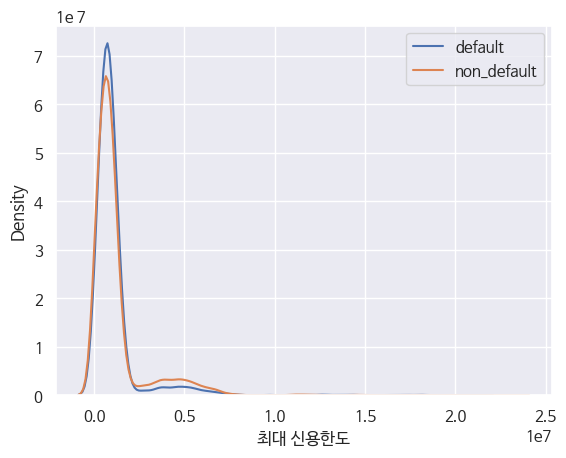

In [20]:
sns.kdeplot(default['최대 신용한도'], label = 'default')
sns.kdeplot(non_default['최대 신용한도'], label = 'non_default')

plt.legend()

# 0.09 ~ 0.23 경우 불이행 가능성 높음

### ***1.2.10 마지막 연체 이후 경과 개월 수***

In [21]:
train['마지막 연체 이후 경과 개월 수'].describe()

,마지막 연체 이후 경과 개월 수
count,10000.000000
mean,30.889200
std,20.011561
min,0.000000
25%,14.000000
50%,28.000000
75%,41.000000
max,88.000000


<Axes: xlabel='마지막 연체 이후 경과 개월 수', ylabel='Density'>

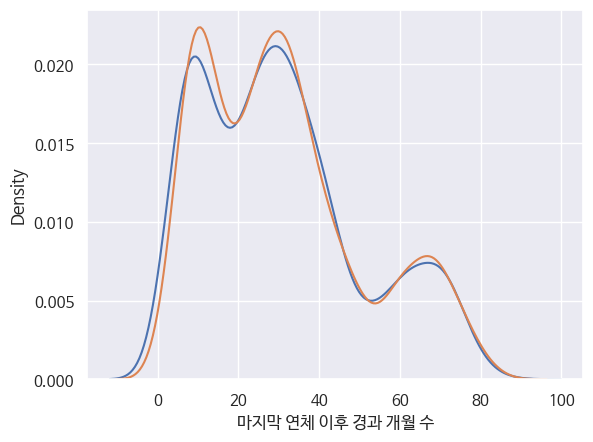

In [24]:
sns.kdeplot(default['마지막 연체 이후 경과 개월 수'], label = 'default')
sns.kdeplot(non_default['마지막 연체 이후 경과 개월 수'], label = 'non_default')

### ***1.2.11 개인 파산 횟***수

In [26]:
train['개인 파산 횟수'].describe()

,개인 파산 횟수
count,10000.000000
mean,0.373200
std,0.843797
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3.000000


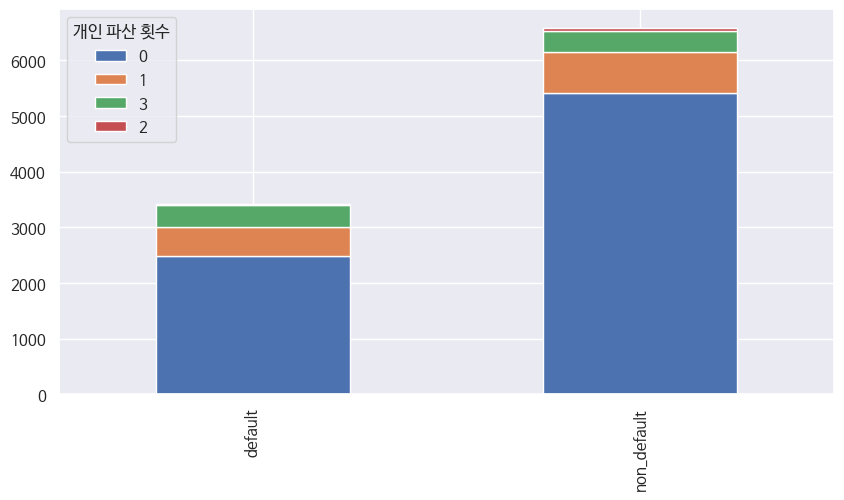

In [27]:
bar_chart('개인 파산 횟수')

In [28]:
train.groupby('채무 불이행 여부')['개인 파산 횟수'].value_counts(normalize = True).unstack() *100

개인 파산 횟수,0,1,2,3
채무 불이행 여부,,,,
0,82.027930,11.338798,0.956284,5.676988
1,72.743259,15.269637,0.322392,11.664713


### ***1.2.12 현재 대출 잔액***

In [29]:
train['현재 대출 잔액'].describe()

,현재 대출 잔액
count,1.000000e+04
mean,5.061200e+05
std,2.831462e+05
min,2.917650e+04
25%,3.001901e+05
50%,4.743412e+05
75%,5.919079e+05
max,1.373613e+06


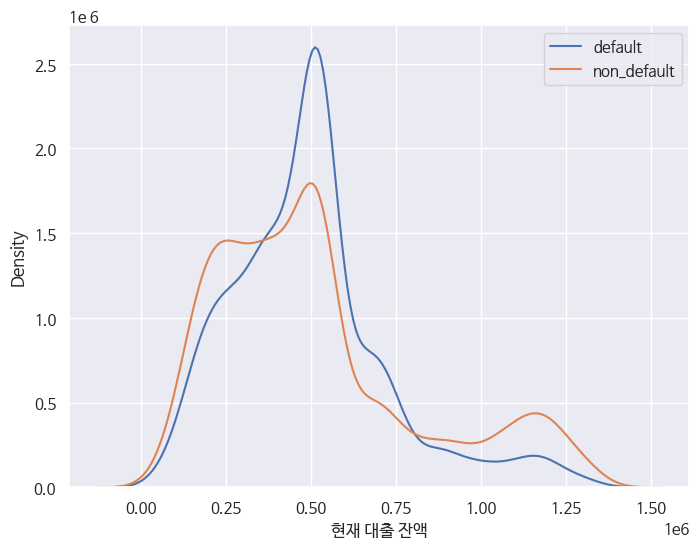

In [51]:
plt.figure(figsize=(8, 6))

sns.kdeplot(default['현재 대출 잔액'], label = 'default')
sns.kdeplot(non_default['현재 대출 잔액'], label = 'non_default')

plt.legend()

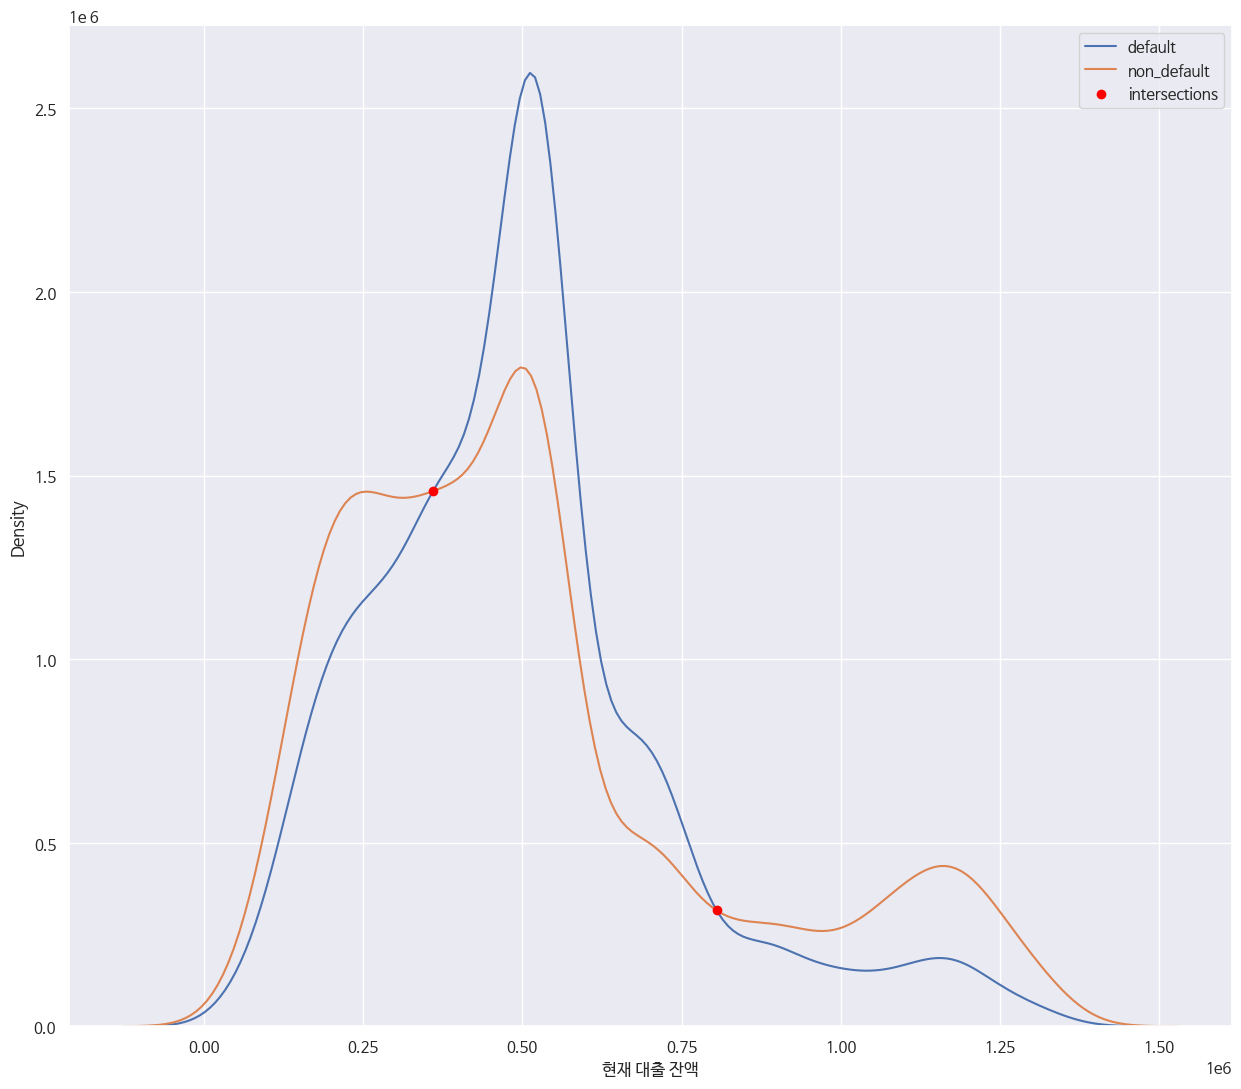

교차점 1 : x = 359558.39, y =  0.0000
교차점 2 : x = 805145.62, y =  0.0000


In [67]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.optimize import fsolve

# KDE 객체 생성
kde_default = gaussian_kde(default['현재 대출 잔액'])
kde_non_default = gaussian_kde(non_default['현재 대출 잔액'])

# x 값 범위 설정
x_values = np.linspace(min(default['현재 대출 잔액'].min(), non_default['현재 대출 잔액'].min()),
                       max(default['현재 대출 잔액'].max(), non_default['현재 대출 잔액'].max()), 1000) # 최소값~최대값 사이를 1000개의 균일한 간격으로 나눈 X 값 배열 생성

# KDE 밀도 값 계산
y_default = kde_default(x_values)
y_non_default = kde_non_default(x_values)

# 두 함수의 차이를 0으로 만드는 x값 찾기
def find_intersection(x):
  return kde_default(x) - kde_non_default(x)

# fsolve를 이용해 교차점 찾기
x_intersections = fsolve(find_intersection, x0 = [291760, 810000]) # fsolve는 방적식의 해를 찾는 함수로 find_section = 0이 되는 x 값을 찾아줌, 초기 추정값 x0=[291760, 810000]을 기준으로 해를 탐색, 교차점이 있을 것으로 에상되는 지점을 설정해야 함
y_intersections = kde_default(x_intersections)

plt.figure(figsize = (15, 13))
sns.kdeplot(default['현재 대출 잔액'], label = 'default')
sns.kdeplot(non_default['현재 대출 잔액'], label = 'non_default')

# 교차점 시각화
plt.scatter(x_intersections, y_intersections, color = 'red', zorder = 3, label = 'intersections')

plt.legend()
plt.show()

# 교차점 출력
for i,(x,y) in enumerate(zip(x_intersections, y_intersections)):
  print(f"교차점 {i+1} : x = {x :.2f}, y = {y : .4f}")

### ***1.2.13 현재 미상환 신용액***

In [74]:
train['현재 미상환 신용액'].describe()

,현재 미상환 신용액
count,1.000000e+04
mean,3.649126e+05
std,3.537942e+05
min,0.000000e+00
25%,1.471856e+05
50%,2.547930e+05
75%,4.749180e+05
max,3.946300e+06


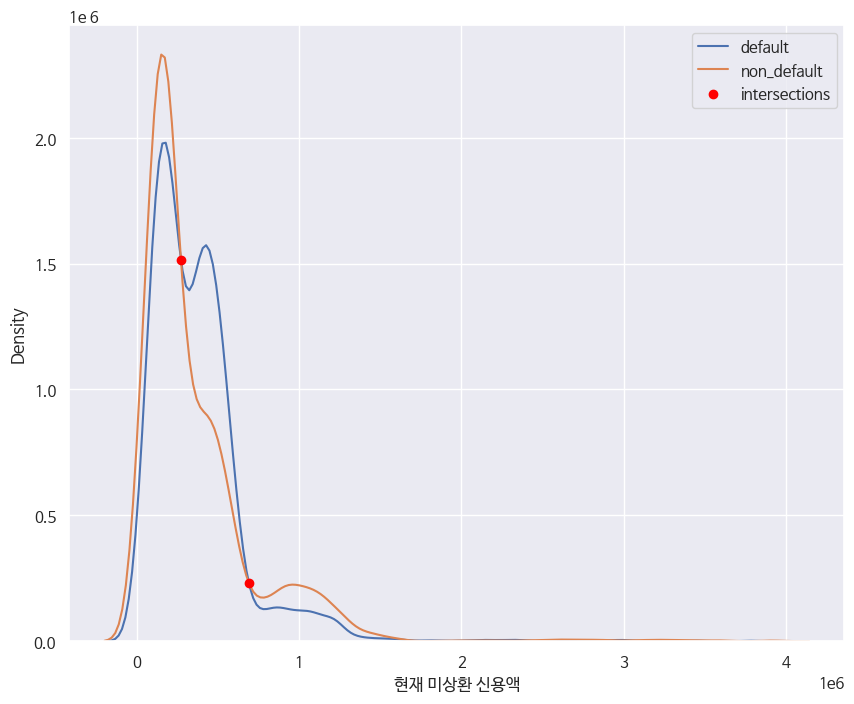

 교차점 1 : x =  273172.56, y =  0.0000
 교차점 2 : x =  691724.91, y =  0.0000


In [87]:
# kde 함수 생성
kde_default = gaussian_kde(default['현재 미상환 신용액'])
kde_nondefault = gaussian_kde(non_default['현재 미상환 신용액'])

# x 범위 설정
x_values = np.linspace(min(default['현재 미상환 신용액'].min(), non_default['현재 미상환 신용액'].min()),
                     max(default['현재 미상환 신용액'].max(), non_default['현재 미상환 신용액'].max()),
                     1000)

# 두 함수의 차이를 0으로 만드는 x값 찾기
def find_intersection(x):
  return kde_default(x) - kde_nondefault(x)

# kde 밀도 값 계산
y_default = kde_default(x_values)
y_nondefault = kde_nondefault(x_values)

# fsolve를 이용해 교차점 찾기
x_intersections = fsolve(find_intersection, x0 =[290000, 500000])
y_intersections = kde_default(x_intersections)

plt.figure(figsize = (10, 8))
sns.kdeplot(default['현재 미상환 신용액'], label = 'default')
sns.kdeplot(non_default['현재 미상환 신용액'], label = 'non_default')

# 교차점 시각화
plt.scatter(x_intersections, y_intersections, color = 'red', zorder = 2, label = 'intersections')

plt.legend()
plt.show()

# 교차점 출력
for i,(x, y) in enumerate(zip(x_intersections, y_intersections)) :
  print(f" 교차점 {i + 1} : x = {x : .2f}, y = {y : .4f}")


### ***1.2.14 현재 미상환 신용액***

### ***1.2.15 월 상환 부채액***

### ***1.2.16 신용 점수***

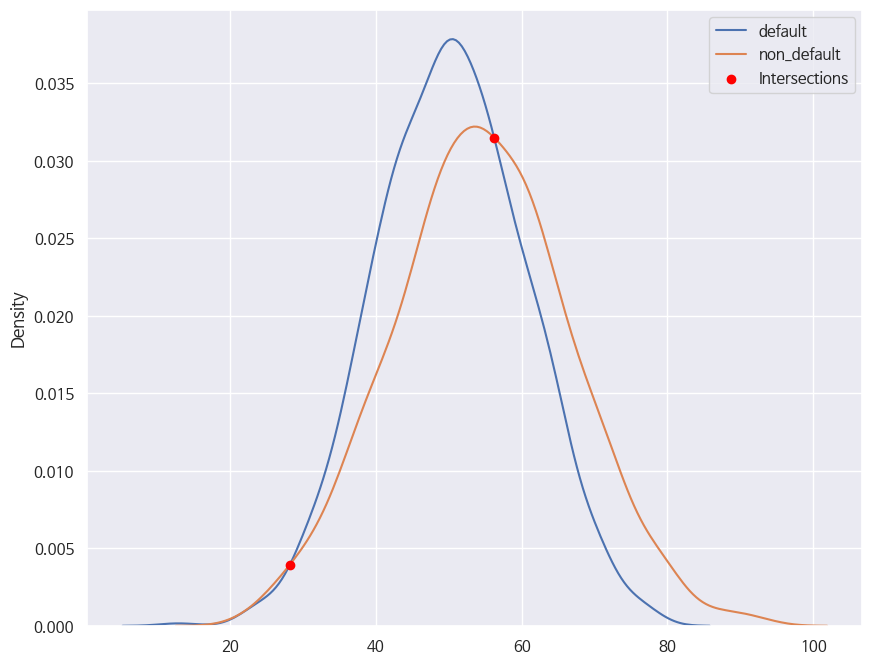

교차점 1: x = 28.18, y = 0.0040
교차점 2: x = 56.21, y = 0.0315


In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from scipy.optimize import fsolve

# 예제 데이터 생성
default_data = np.random.normal(50, 10, 1000)
non_default_data = np.random.normal(55, 12, 1000)

# KDE 함수 생성
kde_default = gaussian_kde(default_data)
kde_non_default = gaussian_kde(non_default_data)

# X 범위 설정
x_vals = np.linspace(20, 90, 1000)

# KDE 밀도 값 계산
y_default = kde_default(x_vals)
y_non_default = kde_non_default(x_vals)

# ✅ 두 함수의 차이를 0으로 만드는 x 값(교차점) 찾기
def find_intersection(x):
    return kde_default(x) - kde_non_default(x)

# fsolve를 이용해 교차점 찾기
x_intersections = fsolve(find_intersection, x0=[40, 60])  # 초기 추정값 40, 60
y_intersections = kde_default(x_intersections)  # 해당 x 값에서의 y 값

# 그래프 그리기
plt.figure(figsize=(10, 8))
sns.kdeplot(default_data, label='default', bw_adjust=1)
sns.kdeplot(non_default_data, label='non_default', bw_adjust=1)

# 교차점 시각화
plt.scatter(x_intersections, y_intersections, color='red', zorder=3, label='Intersections')

plt.legend()
plt.show()

# 교차점 출력
for i, (x, y) in enumerate(zip(x_intersections, y_intersections)):
    print(f"교차점 {i+1}: x = {x:.2f}, y = {y:.4f}")
